# 第二章第二节课堂代码复现

In [1]:
#初始字符串，各个城市经纬度信息
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.72, 31.97]},
{name:'泗阳', geoCoord:[118.70, 33.70]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

# Get data from source using regular expression
使用有规律的表达式获取数据

In [2]:
#导入正则表达式库，进行全搜索

import re
l="color or colour"
pattern = re.compile("colou?r") # ?号前面的u可有可无,re.compile缓存已复用
pattern.findall(l)

['color', 'colour']

In [3]:
#获取每个城市经纬度信息并返回

def get_city_info(city_coordination):
    city_location={}
    for line in city_coordination.split("\n"):#将每行划分为各个line
        if line.startswith("//"):continue   #以//开头的line退出循环
        if line.strip()=="":continue    # 空行也退出循环       
        city = re.findall("name:'(\w+)'",line)[0] #w+表示1个或多个任意非空字符,在每行中找出城市名name,赋值给city
        x_y=re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]     #s表示空 ，d表示数字,输出每行的Coord后面经纬度组成的列表
        x_y=tuple(map(float,x_y))#将x_y转化为小数，返回迭代器
        city_location[city]=x_y
    return city_location
city_info=get_city_info(coordination_source)

# 通过经纬度计算两地间直线距离(通用-很重要)

In [31]:
###################函数依然存在问题，远距离会报错
import math
def two_distance(origin, destination):
    lon1, lat1 = origin#经度在前
    lon2, lat2 = destination
    radius = 6371  # km
    c = math.sin(90-lat1)*math.sin(90-lat2)*math.cos(lon1-lon2) + math.cos(90-lat1)*math.cos(90-lat2)
    d = radius * math.acos(c)* ((math.pi) /180)
    return d
two_distance((118.78, 32.04),(110.23, 23.16))

131.36609472411453

In [28]:
#输入城市关联出经纬度求距离函数

def get_city_distance(city1,city2):
    return two_distance(city_info[city1],city_info[city2])
get_city_distance("北京","广州")

273.50054905557096

# Draw the graph   绘图


In [6]:
#生成所有城市名称组成的列表

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['font.sans-serif'] = ['SimHei']#设置字体为中文
plt.rcParams['axes.unicode_minus'] = False  #设置字符正常显示
city_info.keys()  #生出所有城市集合
print(list(city_info.keys()))

['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '泗阳', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门']


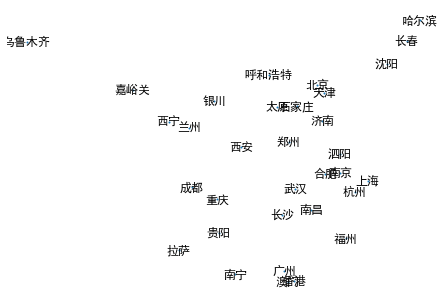

In [7]:
#生成城市名称  散点图

import networkx as nx
city_graph = nx.Graph()#创建一个空无向图
city_graph.add_nodes_from(list(city_info.keys()))#加入点的列表
nx.draw(city_graph,city_info,with_labels=True,node_size=1)#无向图中加载城市点，node表示点

# Build connection between.Let's assume that two cities are connected if their distance is less than 700 km.

In [32]:
#返回所有城市所有小于700km的路线

from collections import defaultdict#当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值
threshold = 700  # 定义限制值

def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue 
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)# c1对应c2组成列表
    return cities_connection
cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关',
              '西宁',
              '成都',
              '石家庄',
              '拉萨',
              '贵阳',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '泗阳',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '沈阳',
              '长春',
              '哈尔滨',
              '太原',
              '西安',
              '北京',
              '上海',
              '重庆',
              '天津',
              '呼和浩特',
              '南宁',
              '银川',
              '乌鲁木齐',
              '香港',
              '澳门'],
             '嘉峪关': ['兰州',
              '西宁',
              '成都',
              '石家庄',
              '拉萨',
              '贵阳',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '泗阳',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',


# Draw connection graph 

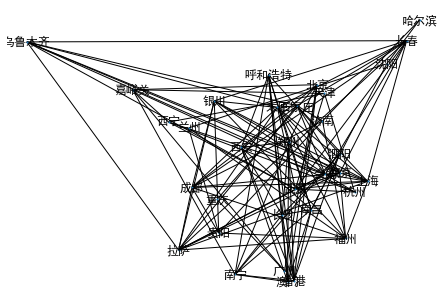

In [9]:
#用draw(无向图,网络布局,keywords)表示 城市连接

cities_connection_graph = nx.Graph(cities_connection)#依据每个城市与距离小于700的城市为基础创建一个无向网络图
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=1)
#以city_info为图像布局，节点为关键字
#with_labels`: 节点是否带标签（默认为True）,False则不显示城市名
#node_size为节点大小尺寸，默认300

# BFS 1 version

In [10]:
#采用广度优先搜索法求两地间连接路线

def search_1(graph,start,destination):
    pathes = [[start]] #存储搜索路径
    visited = set()  #存储已搜索访问的节点
    
    while pathes:#遍历所有pathes可能
        path = pathes.pop(0)# 切取第一条路径
        #print("path:%s"%path)
        froniter = path[-1] #提取即将探索的节点
        #print("froniter:%s"%froniter)
        
        if froniter in visited: continue  #检查此节点如果已经访问过，则不用再次探索,退出循环
        successors = graph[froniter]#返回所有目的地列表
        print("successors:%s"%successors)
        
        for city in successors:  #去除所有目的地城市
            if city in path: continue #检查是否会形成环
            new_path = path + [city]   #生成每一种【出发地，可能目的地】
            #print("new_path%s"%new_path)
            pathes.append(new_path) #将每一种【出发地，可能目的地】新路径加入pathes列表中，形成嵌套列表
            #print("pathes:%s"%pathes)
            if city==destination:#如果可能目的地等于预设目的地
                return new_path    #函数中使用return来终止函数的执行
        visited.add(froniter)
        #print("visited:%s"%visited)
        
search_1(cities_connection,"北京","上海")

successors:['嘉峪关', '郑州', '广州', '西安', '重庆', '香港', '澳门']
successors:['西宁', '杭州', '广州', '北京', '天津', '南宁']
successors:['南昌', '长沙', '西安', '北京', '呼和浩特', '南宁', '香港', '澳门']
successors:['嘉峪关', '北京', '重庆']
successors:['郑州', '南昌', '长沙', '北京', '呼和浩特', '香港', '澳门']
successors:['广州', '北京']
successors:['郑州', '泗阳', '南昌', '长沙', '西安', '北京', '呼和浩特', '南宁', '澳门']
successors:['郑州', '南昌', '长沙', '西安', '北京', '呼和浩特', '南宁', '香港']
successors:['嘉峪关', '武汉', '合肥', '杭州', '天津']
successors:['嘉峪关', '西宁', '武汉', '合肥', '天津']
successors:['嘉峪关', '西宁', '武汉', '杭州']
successors:['嘉峪关', '郑州', '泗阳', '南昌', '长沙', '呼和浩特', '香港', '澳门']
successors:['郑州', '泗阳', '长沙', '沈阳', '西安', '呼和浩特', '南宁', '香港', '澳门']
successors:['郑州', '泗阳', '南昌', '西安', '呼和浩特', '南宁', '香港', '澳门']
successors:['郑州', '泗阳', '南昌', '长沙', '西安', '南宁', '香港', '澳门']
successors:['南昌', '长沙', '呼和浩特', '南宁', '香港']
successors:['西宁', '拉萨', '南京', '合肥', '杭州', '长春', '太原', '上海', '天津', '乌鲁木齐']


['北京', '嘉峪关', '西宁', '武汉', '上海']

# Optimal search using variation of BFS
最优搜索

In [11]:
#采用某种规则获取最优路径

def search_2(graph,start,destination,search_strategy):
    pathes =[[start]]
    visited = set()
   
    while pathes:
        path = pathes.pop(0)#截取pathes第一个元素
        froniter = path[-1] #获取path中最后一个元素
        if froniter in visited : continue  #break跳出当前循环，continue终止本轮循环
        if froniter == destination:
            return path  #如果path中最后一个城市等于目的地，则返回path，退出函数
        successsors = graph[froniter]#返回froniter城市键在graph中对应的列表键值
        for city in successsors:
            if city in path: continue # 如果可能目的城市等于开始城市，退出函数
            new_path = path+[city]#开始城市加上可能的目的城市组成新列表
            pathes.append(new_path)#所有新列表组成大的嵌套列表
        pathes = search_strategy(pathes)#search_strategy可能是某种函数、规则
        #print(pathes)
        visited.add(froniter)
        
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x) #    lambda x:x按原值返回 即pathes

['北京', '嘉峪关', '西宁', '武汉', '上海']

In [12]:
#获取多个城市间距离

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        #print(i,_)#返回索引号加城市名的集合，不显示path中最后一个城市
        distance += get_city_distance(path[i],path[i+1])#调用计算两个城市间距离函数
    return distance #返回第一个城市到第二个城市+第二个城市到第三个城市+。。。+倒数第二个城市到目的地的距离

get_distance_of_path(["南京","泗阳","香港"])

285.9565108756542

In [13]:
#将各种可能路径进行距离排序

def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)#将

search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)
#将北京到上海的各种可能路线按照get_distance_of_path()函数中返回的距离进行排序

['北京', '嘉峪关', '杭州', '合肥', '上海']

# Machine Learning

In [14]:
#返回数据库信息的矩阵行和列

from sklearn.datasets import load_boston #sklearn.datasets库自带数据集：波士顿房价数据库
import random
dataset = load_boston()#dataset是一个含有data、target键的字典
#print(dataset)
x,y=dataset["data"],dataset['target']
#print(y)
print(x.shape)#返回x的行数(嵌套列表中子列表个数)和列数(每个字列表中元素个数)
print(y.shape)#如果不是嵌套列表则只有行(元素个数)没有列
print(x[1])
print(x[1].shape)

(506, 13)
(506,)
[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]
(13,)


In [15]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [17]:

X_rm =x[:,5]#取x的前5行
print(x)
print(X_rm.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506,)


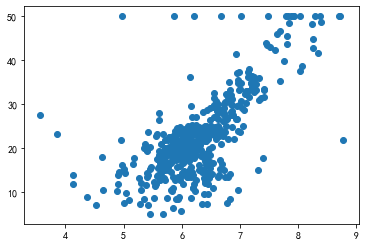

In [18]:
plt.scatter(X_rm,y)#绘画浮点图,共有506*13个点

# Gradient descent  梯度下降   


### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [19]:
#定义函数

def price(rm, k, b):
    return k * rm + b

# Define mean square loss 方差
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [20]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

# Define partial derivatives 偏导数，多元函数的导数
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [21]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [22]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 216503.6000526129, parameters k is 62.8862006726807 and b is 91.03443948576307
Iteration 1, the loss is 182503.02850770162, parameters k is 57.00460098209719 and b is 90.1070026609649
Iteration 2, the loss is 153847.09558970833, parameters k is 51.60506089261018 and b is 89.25534811715248
Iteration 3, the loss is 129695.66340482217, parameters k is 46.648073400633166 and b is 88.47326515307223
Iteration 4, the loss is 109340.65755873767, parameters k is 42.09736928333365 and b is 87.75505206301965
Iteration 5, the loss is 92185.30774557636, parameters k is 37.91965174760021 and b is 87.09547442231165
Iteration 6, the loss is 77726.65156358558, parameters k is 34.08435282574783 and b is 86.4897267914565
Iteration 7, the loss is 65540.78860236525, parameters k is 30.563409735716174 and b is 85.93339755884317
Iteration 8, the loss is 55270.45247915789, parameters k is 27.331059569578922 and b is 85.4224366647341
Iteration 9, the loss is 46614.53645965206, paramete

Iteration 125, the loss is 203.94248553134662, parameters k is -8.830009648609394 and b is 79.4083706463903
Iteration 126, the loss is 203.93475639016162, parameters k is -8.829712528087823 and b is 79.40560628230233
Iteration 127, the loss is 203.9270303992945, parameters k is -8.829404424829004 and b is 79.40284371235485
Iteration 128, the loss is 203.9193071218184, parameters k is -8.82908623976846 and b is 79.4000827949146
Iteration 129, the loss is 203.91158618948663, parameters k is -8.82875880000588 and b is 79.39732339995568
Iteration 130, the loss is 203.90386729193506, parameters k is -8.828422864856313 and b is 79.39456540810829
Iteration 131, the loss is 203.8961501675833, parameters k is -8.828079131405417 and b is 79.39180870978541
Iteration 132, the loss is 203.88843459596708, parameters k is -8.827728239609456 and b is 79.38905320438104
Iteration 133, the loss is 203.88072039127482, parameters k is -8.827370776977313 and b is 79.38629879953419
Iteration 134, the loss is

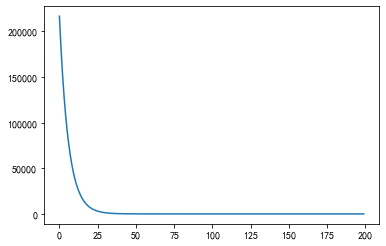

In [23]:
plt.plot(list(range(iteration_num)),losses)

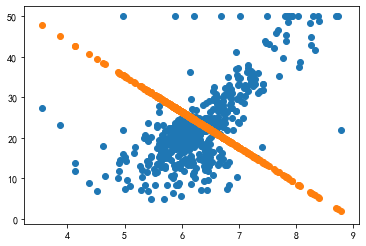

In [24]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)